In [41]:
import pandas as pd

In [42]:
df1 = pd.read_csv('Cleaned_Data.csv')

Athletics
Swimming
Rowing
Cycling
Shooting

In [43]:
df1_athletics_women = df1[(df1['Sport'] == 'Swimming') & (df1['Sex'] == 0.0)]
df1_athletics_women = df1_athletics_women.drop(columns = ['Sport', 'Unnamed: 0', 'ID', 'Name'])
df1_athletics_women = pd.concat([df1_athletics_women, pd.get_dummies(df1_athletics_women['NOC'])], axis=1)
df1_athletics_women = df1_athletics_women.drop(columns = ['NOC'])


In [44]:
X_train = df1_athletics_women[df1_athletics_women['Year']<2016].drop(columns=['Winner', 'Year'])
X_test = df1_athletics_women[df1_athletics_women['Year']==2016].drop(columns=['Winner', 'Year'])
y_train = df1_athletics_women[df1_athletics_women['Year']<2016]['Winner']
y_test = df1_athletics_women[df1_athletics_women['Year']==2016]['Winner']

In [45]:
X_train.head()

,Sex,Age,Height,Weight,AHO,ALB,ALG,AND,ANG,ANZ,...,URS,URU,USA,UZB,VEN,VIN,YEM,YUG,ZAM,ZIM
13,0.0,26.0,185.0,78.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0.0,22.0,185.0,78.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0.0,30.0,185.0,78.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0.0,34.0,185.0,78.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0.0,21.0,194.0,78.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_test

,Sex,Age,Height,Weight,AHO,ALB,ALG,AND,ANG,ANZ,...,URS,URU,USA,UZB,VEN,VIN,YEM,YUG,ZAM,ZIM
595,0.0,20.0,180.0,74.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
644,0.0,30.0,197.0,92.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,0.0,30.0,197.0,92.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0.0,21.0,180.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,0.0,18.0,182.0,68.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61358,0.0,28.0,199.0,99.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62965,0.0,29.0,194.0,90.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63286,0.0,22.0,181.0,84.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63457,0.0,17.0,158.0,65.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y_test

595      0.0
644      0.0
645      1.0
798      0.0
896      0.0
        ... 
61358    0.0
62965    0.0
63286    0.0
63457    0.0
63634    0.0
Name: Winner, Length: 164, dtype: float64

In [48]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()

In [49]:
# rf.fit(X_train, y_train)
# prediction = rf.predict(X_test)

In [50]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, prediction))

In [51]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import shap

# explainer = shap.TreeExplainer(rf) #, feature_perturbation = 'interventional')

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 13 to 63656
Columns: 171 entries, Sex to ZIM
dtypes: float64(4), uint8(167)
memory usage: 470.2 KB


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 595 to 63634
Columns: 171 entries, Sex to ZIM
dtypes: float64(4), uint8(167)
memory usage: 33.2 KB


In [55]:
#shap_values = explainer.shap_values(X_train)

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [57]:
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [58]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

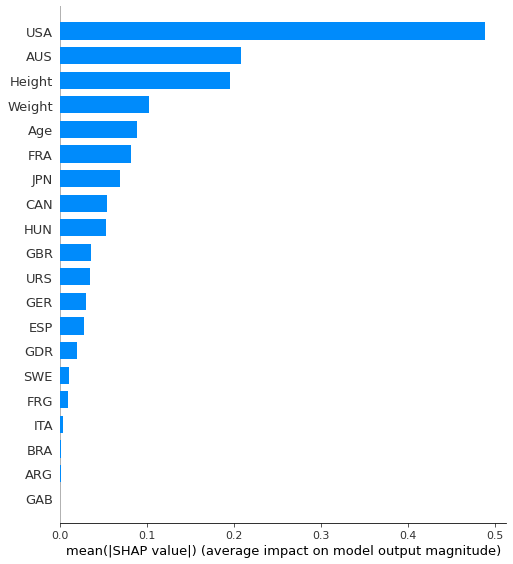

In [59]:
import matplotlib.pyplot as plt
plt = shap.summary_plot(shap_values, X_test, plot_type='bar')


In [60]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, prediction))